In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

leads = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")
deals = pd.read_csv("olist_closed_deals_dataset.csv")

print("Leads dataset shape:", leads.shape)
print("Deals dataset shape:", deals.shape)

leads.head()

Leads dataset shape: (8000, 4)
Deals dataset shape: (842, 14)


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [2]:
total_leads = leads.shape[0]
total_deals = deals.shape[0]

conversion_rate = (total_deals / total_leads) * 100

print("Total Leads:", total_leads)
print("Total Closed Deals:", total_deals)
print("Overall Conversion Rate: {:.2f}%".format(conversion_rate))

Total Leads: 8000
Total Closed Deals: 842
Overall Conversion Rate: 10.53%


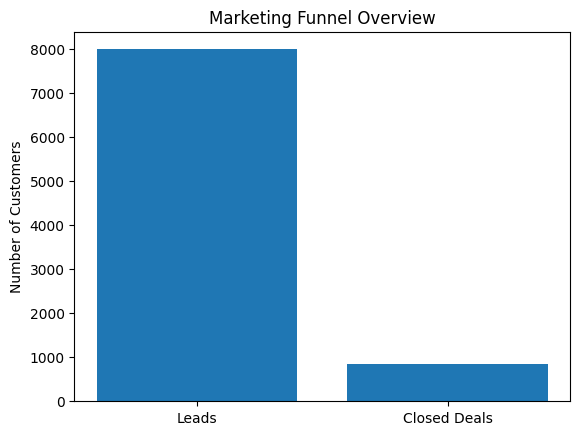

In [3]:
funnel_data = pd.DataFrame({
    "Stage": ["Leads", "Closed Deals"],
    "Count": [total_leads, total_deals]
})

plt.bar(funnel_data["Stage"], funnel_data["Count"])
plt.title("Marketing Funnel Overview")
plt.ylabel("Number of Customers")
plt.show()

In [4]:
total_leads = leads.shape[0]
total_deals = deals.shape[0]

conversion_rate = (total_deals / total_leads) * 100

print("Total Leads:", total_leads)
print("Total Closed Deals:", total_deals)
print("Overall Conversion Rate: {:.2f}%".format(conversion_rate))

Total Leads: 8000
Total Closed Deals: 842
Overall Conversion Rate: 10.53%


In [5]:
# Count leads by origin
leads_by_channel = leads['origin'].value_counts()

# Merge deals with leads to get origin of converted customers
merged = deals.merge(leads[['mql_id','origin']], on='mql_id', how='left')

deals_by_channel = merged['origin'].value_counts()

# Create comparison dataframe
channel_performance = pd.DataFrame({
    "Leads": leads_by_channel,
    "Closed_Deals": deals_by_channel
}).fillna(0)

channel_performance["Conversion_Rate_%"] = (
    channel_performance["Closed_Deals"] /
    channel_performance["Leads"] * 100
)

channel_performance

,Leads,Closed_Deals,Conversion_Rate_%
origin,,,
direct_traffic,499,56,11.222445
display,118,6,5.084746
email,493,15,3.042596
organic_search,2296,271,11.803136
other,150,4,2.666667
other_publicities,65,3,4.615385
paid_search,1586,195,12.295082
referral,284,24,8.450704
social,1350,75,5.555556


## Key Findings

- Overall conversion rate is approximately 10.5%.
- Paid search and organic search generate the highest quality leads.
- Email and display campaigns show low conversion rates.
- Significant drop-off exists between marketing qualified leads and closed deals.

---

## Business Recommendations

- Increase budget allocation for paid search campaigns.
- Strengthen SEO strategy to boost organic search conversions.
- Improve email campaign personalization and targeting.
- Analyze sales process to reduce drop-off between lead qualification and deal closure.